In [1]:
import warnings

from opticalglass.glass import get_filepath

import opticalglass as og
import opticalglass.buchdahl as buchdahl
import opticalglass.glass as ogl
from opticalglass.glassfactory import create_glass
from opticalglass import schott

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Build Multi-Index for Schott

In [2]:
catalog = 'Schott'
gname = 'F2'
gname1 = 'N-BK7'
gname2 = 'SF6HT'

In [3]:
cat_pd = schott.SchottCatalog()
cat_df = cat_pd.df

In [4]:
cat_pd

In [5]:
vars(cat_pd)

{'name': 'Schott',
 'df': category         NaN          abbe number                NaN  \
 data item         nd       ne          vd     ve Colour code   
 glass                                                          
 F2           1.62004  1.62408       36.37  36.11       35/32   
 F2HT         1.62004  1.62408       36.37  36.11       35/32   
 F5           1.60342  1.60718       38.03  37.77       35/32   
 FK5HTi       1.48748  1.48913       70.47  70.29       29/25   
 K10          1.50137  1.50349       56.41  56.15       33/30   
 ...              ...      ...         ...    ...         ...   
 SF56A         1.7847   1.7918       26.08  25.87       42/37   
 SF57         1.84666  1.85504       23.83  23.64      40/37*   
 SF57HTultra  1.84666  1.85504       23.83  23.64      39/36*   
 SF6          1.80518  1.81265       25.43  25.24       42/36   
 SF6HT        1.80518  1.81265       25.43  25.24       41/36   
 
 category    dispersion coefficients                           

In [6]:
cat_df

category         NaN          abbe number                NaN  \
data item         nd       ne          vd     ve Colour code   
glass                                                          
F2           1.62004  1.62408       36.37  36.11       35/32   
F2HT         1.62004  1.62408       36.37  36.11       35/32   
F5           1.60342  1.60718       38.03  37.77       35/32   
FK5HTi       1.48748  1.48913       70.47  70.29       29/25   
K10          1.50137  1.50349       56.41  56.15       33/30   
...              ...      ...         ...    ...         ...   
SF56A         1.7847   1.7918       26.08  25.87       42/37   
SF57         1.84666  1.85504       23.83  23.64      40/37*   
SF57HTultra  1.84666  1.85504       23.83  23.64      39/36*   
SF6          1.80518  1.81265       25.43  25.24       42/36   
SF6HT        1.80518  1.81265       25.43  25.24       41/36   

category    dispersion coefficients                                          \
data item                        B1        B2        B3        C1        C2   
glass                                                                         
F2                         1.345334  0.209073  0.937357  0.009977  0.047045   
F2HT                       1.345334  0.209073  0.937357  0.009977  0.047045   
F5                         1.310446  0.196034   0.96613  0.009586  0.045763   
FK5HTi                     0.909362  0.279077  0.891813  0.005201  0.015894   
K10                        1.156871  0.064263  0.872376  0.008094  0.038605   
...                             ...       ...       ...       ...       ...   
SF56A                      1.705793  0.344223  1.096018  0.013387  0.057956   
SF57                       1.816514  0.428894  1.071863   0.01437   0.05928   
SF57HTultra                1.816514  0.428894  1.071863   0.01437   0.05928   
SF6                        1.724485  0.390105  1.045729  0.013487  0.056932   
SF6HT                      1.724485  0.390105  1.045729  0.013487  0.056932   

category     ...      NaN                       \
data item    ...   DP g,F   DP i,g    Glascode   
glass        ...                                 
F2           ...   0.0002   0.0006  620364.360   
F2HT         ...   0.0002   0.0006  620364.360   
F5           ...  -0.0003  -0.0028  603380.347   
FK5HTi       ...   0.0036   0.0321  487705.245   
K10          ...  -0.0015  -0.0048  501564.252   
...          ...      ...      ...         ...   
SF56A        ...   0.0098     <NA>  785261.492   
SF57         ...   0.0123     <NA>  847238.551   
SF57HTultra  ...   0.0123     <NA>  847238.551   
SF6          ...   0.0092   0.0669  805254.518   
SF6HT        ...   0.0092   0.0669  805254.518   

category                                                                   \
data item                                              Remarks       Date   
glass                                                                       
F2                                  lead containing glass type 2014-02-01   
F2HT                                lead containing glass type 2014-02-01   
F5                                  lead containing glass type 2014-02-01   
FK5HTi                                            i-line glass 2013-05-17   
K10                                 lead containing glass type 2014-02-01   
...                                                        ...        ...   
SF56A                               lead containing glass type 2014-02-01   
SF57         lead containing glass type, suitable for preci... 2018-02-21   
SF57HTultra  lead containing glass type, suitable for preci... 2018-02-21   
SF6                                 lead containing glass type 2014-02-01   
SF6HT                               lead containing glass type 2014-02-01   

category                                             
data item   rel. Price WR-J SR-J   AT Abrasion HG-J  
glass                                                
F2            1.241862                               


In [7]:
nd = cat_df['refractive indices']['d'].to_numpy(dtype=float)
nF = cat_df['refractive indices']['F'].to_numpy(dtype=float)
nC = cat_df['refractive indices']['C'].to_numpy(dtype=float)

In [8]:
cat_df.columns.has_duplicates

False

In [9]:
nd, coefs = buchdahl.calc_buchdahl_coords(nd, nF, nC)

In [10]:
coefs /= np.array((nd - 1.0), dtype=float)

## Test Series extracted from DataFrame

In [11]:
gla = cat_df.loc[gname]
gla1 = cat_df.loc[gname1]

In [12]:
cat_df.loc[gname]['dispersion coefficients']

data item
B1      1.345334
B2      0.209073
B3      0.937357
C1      0.009977
C2      0.047045
C3    111.886764
Name: F2, dtype: object

In [13]:
gla['dispersion coefficients']

data item
B1      1.345334
B2      0.209073
B3      0.937357
C1      0.009977
C2      0.047045
C3    111.886764
Name: F2, dtype: object

In [14]:
coefs = gla['dispersion coefficients'].to_numpy(dtype=float)

In [15]:
coefs

array([1.34533359e+00, 2.09073176e-01, 9.37357162e-01, 9.97743871e-03,
       4.70450767e-02, 1.11886764e+02])

In [16]:
coefs[3]

0.00997743871

In [17]:
cat_df.loc[gname]['internal transmission mm, 10']

data item
2500.0    0.809
2325.0    0.859
1970.0    0.949
1530.0    0.996
1060.0    0.999
700.0     0.999
660.0     0.999
620.0     0.999
580.0     0.999
546.0     0.999
500.0     0.999
460.0     0.998
436.0     0.997
420.0     0.996
405.0     0.995
400.0     0.994
390.0     0.991
380.0     0.985
370.0     0.975
365.0     0.968
350.0     0.905
334.0     0.537
320.0      0.08
310.0         0
300.0          
290.0          
280.0          
270.0          
260.0          
250.0          
Name: F2, dtype: object

In [18]:
cat_df.loc[gname]['refractive indices'].array

<PandasArray>
[1.58465, 1.58958, 1.59513,  1.6019, 1.60279, 1.60671, 1.61227, 1.61503,
 1.61582, 1.61656, 1.61989, 1.62004, 1.62408, 1.63208,  1.6331, 1.64202,
 1.65064, 1.66623, 1.68455,     nan,     nan,     nan,    <NA>]
Length: 23, dtype: object

## Test factory method, create_glass

In [19]:
gla2 = create_glass(gname2, catalog)

In [20]:
wvls = gla2.glass_data()['refractive indices'].index; wvls

Index([2325.4, 1970.1, 1529.6, 1060.0,    't',    's',    'r',    'C',   'C'',
        632.8,    'D',    'd',    'e',    'F',   'F'',    'g',    'h',    'i',
        334.1,  312.6,  296.7,  280.4,  248.3],
      dtype='object', name='data item')

In [21]:
for w_str in wvls:
    n_line = gla2.meas_rindex(w_str)
    try:
        n_intrp = gla2.rindex(w_str)
    except KeyError:
        print(f'{w_str}: {n_line}, Key error')
    else:
        print(f'{w_str}: {n_line}, {n_intrp:9.6f}, {n_intrp-n_line:8.2g}')

2325.4: 1.75302,  1.753019, -7.3e-07
1970.1: 1.75813,  1.758129, -1.2e-06
1529.6: 1.76444,  1.764445,  4.7e-06
1060.0: 1.7738,  1.773797, -2.7e-06
t: 1.77517,  1.775171,  7.6e-07
s: 1.78157,  1.781565, -4.8e-06
r: 1.79117,  1.791166, -3.6e-06
C: 1.79609,  1.796092,  1.9e-06
C': 1.7975,  1.797504,  3.7e-06
632.8: 1.79884,  1.798835, -4.7e-06
D: 1.80491,  1.804909, -1.3e-06
d: 1.80518,  1.805182,  2.1e-06
e: 1.81265,  1.812650,   -4e-07
F: 1.82775,  1.827752,  2.1e-06
F': 1.8297,  1.829705,  4.9e-06
g: 1.84707,  1.847073,  2.6e-06
h: 1.86436,  1.864365,  4.9e-06
i: 1.89703,  1.897026, -3.9e-06
334.1: <NA>,  1.938220, <NA>
312.6: nan,  1.983526,      nan
296.7: nan,  2.034692,      nan
280.4: nan,  2.120094,      nan
248.3: <NA>,  2.881185, <NA>


In [22]:
gla2.meas_rindex(wvls).array

<PandasArray>
[1.75302, 1.75813, 1.76444,  1.7738, 1.77517, 1.78157, 1.79117, 1.79609,
  1.7975, 1.79884, 1.80491, 1.80518, 1.81265, 1.82775,  1.8297, 1.84707,
 1.86436, 1.89703,    <NA>,     nan,     nan,     nan,    <NA>]
Length: 23, dtype: object

In [23]:
gla2.rindex(wvls)

array([1.75301927, 1.75812881, 1.76444467, 1.77379732, 1.77517076,
       1.78156516, 1.79116638, 1.79609194, 1.79750374, 1.7988353 ,
       1.80490866, 1.80518208, 1.8126496 , 1.82775211, 1.82970493,
       1.84707261, 1.86436488, 1.89702614, 1.93821976, 1.98352564,
       2.03469231, 2.12009442, 2.88118546])

In [24]:
gla2.meas_rindex(wvls).array-gla2.rindex(wvls)

<PandasArray>
[  7.337543270757863e-07,   1.191769729347314e-06,  -4.673166853264021e-06,
   2.683390140090225e-06,  -7.594542605904309e-07,   4.840167238562287e-06,
  3.6154470093308078e-06, -1.9378228395261488e-06, -3.7366354079804154e-06,
   4.700246603484004e-06,   1.341146030897633e-06,  -2.078102276259486e-06,
   3.954437870490324e-07,  -2.113880698928483e-06,  -4.926433854413048e-06,
  -2.606475076660786e-06,   -4.88340952720101e-06,  3.8566193496514245e-06,
                    <NA>,                     nan,                     nan,
                     nan,                    <NA>]
Length: 23, dtype: object

In [25]:
cat_df.loc[gname]['specific gravity']['d']

3.599

In [26]:
cat_df.loc[gname]['chemical properties']

data item
CR      1
FR      0
SR      1
AR    2.3
PR    1.3
Name: F2, dtype: object

In [27]:
cat_df.loc[gname]['thermal properties']

data item
Tg                             434
T13                            430
T7.6                           594
Heat capacity (cp)           0.557
Heat conductivity(lambda)     0.78
alpha -30/70                   8.2
alpha 20/300                   9.2
Name: F2, dtype: object

In [28]:
cat_df.loc[gname1]['internal transmission mm, 10']

data item
2500.0       0.665
2325.0       0.793
1970.0       0.933
1530.0    0.991951
1060.0    0.998799
700.0     0.998398
660.0     0.997997
620.0     0.997997
580.0     0.998398
546.0     0.998398
500.0     0.997596
460.0     0.997194
436.0     0.996792
420.0     0.997194
405.0     0.997194
400.0     0.996792
390.0     0.995585
380.0     0.992761
370.0        0.991
365.0     0.988297
350.0     0.967197
334.0        0.905
320.0         0.77
310.0        0.574
300.0        0.292
290.0        0.063
280.0             
270.0             
260.0             
250.0             
Name: N-BK7, dtype: object

In [29]:
cat_df['refractive indices']['d'].array

<FloatingArray>
[1.62004, 1.62004, 1.60342, 1.48748, 1.50137, 1.51112,  1.7495, 2.02204,
 1.58144, 1.58144,
 ...
 1.72825, 1.78472, 1.64769,  1.7552,  1.6727,  1.7847, 1.84666, 1.84666,
 1.80518, 1.80518]
Length: 123, dtype: Float64

In [30]:
cat_df.loc[gname]['mechanical properties']

data item
Young´s modulus (E)       57.0
Poisson ratio (µ)         0.22
Knoop hardness (HK)        420
Abrasion hardness (HG)       2
Name: F2, dtype: object

In [31]:
cat_df.loc[[gname, gname1]]['mechanical properties']['Knoop hardness (HK)']

glass
F2       420
N-BK7    610
Name: Knoop hardness (HK), dtype: Int64

In [32]:
trns_data = cat_df.loc[[gname, gname1]]['internal transmission mm, 10'].T; trns_data

glass,F2,N-BK7
data item,,
2500.0,0.809,0.665
2325.0,0.859,0.793
1970.0,0.949,0.933
1530.0,0.996,0.991951
1060.0,0.999,0.998799
700.0,0.999,0.998398
660.0,0.999,0.997997
620.0,0.999,0.997997
580.0,0.999,0.998398


<AxesSubplot:xlabel='data item'>

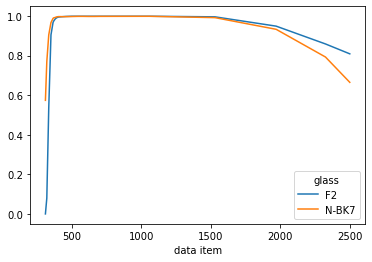

In [33]:
trns_data[2500.0:310.0].plot()

<AxesSubplot:xlabel='data item'>

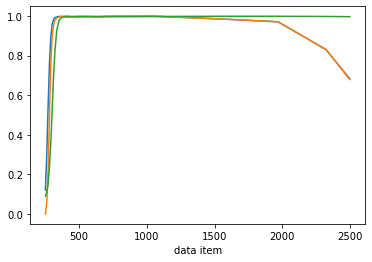

In [34]:
cat_df['internal transmission mm, 10'].T.plot(legend=False)

In [35]:
gla_v2 = schott.SchottGlass(gname)

In [36]:
gla_v2.meas_rindex('F')

1.63208

In [37]:
gla_v2.glass_code()

'620.364'